In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fm_data_new = pd.read_csv('./FinModel-DRAFT-042623-TEST_comp.csv')
fm_data_old = pd.read_csv('./FinModel-DRAFT-031523-TEST_comp.csv')
fm_data_for_labels = fm_data_new

In [2]:
# Prep dataframes

# Remove detailed column title row
fm_data_new = fm_data_new.drop(index=0)

# convert month to datetime and set as index
fm_data_new['month'] = pd.to_datetime(fm_data_new['month'])
fm_data_new.set_index('month', inplace=True)

# convert other cols to numeric
non_num_cols = ['act_fcast']
cols_to_convert = fm_data_new.columns.difference(non_num_cols)
fm_data_new[cols_to_convert] = fm_data_new[cols_to_convert].apply(pd.to_numeric, errors='coerce')


In [3]:
# Prep dataframes

# Remove detailed column title row
fm_data_old = fm_data_old.drop(index=0)

# convert month to datetime and set as index
fm_data_old['month'] = pd.to_datetime(fm_data_old['month'])
fm_data_old.set_index('month', inplace=True)

# convert other cols to numeric
non_num_cols = ['act_fcast']
cols_to_convert = fm_data_old.columns.difference(non_num_cols)
fm_data_old[cols_to_convert] = fm_data_old[cols_to_convert].apply(pd.to_numeric, errors='coerce')


In [4]:
variance_months = fm_data_new['act_fcast'] != fm_data_old['act_fcast']
fm_data_new_var_mths = fm_data_new[variance_months]

In [5]:
last_cols = ['cash', 'arr', 'cac', 'headcount', 'mrr']
sum_cols = fm_data_new.columns.difference(non_num_cols).difference(last_cols)

In [6]:

# Calculate the sums of selected columns and their differences
sum_diff = fm_data_new.loc[variance_months, sum_cols].sum() - fm_data_old.loc[variance_months, sum_cols].sum()
sum_diff_pct = abs(sum_diff / fm_data_old.loc[variance_months, sum_cols].sum())

# Select the last row of selected columns and calculate their differences
last_diff = fm_data_new.loc[variance_months, last_cols].iloc[-1] - fm_data_old.loc[variance_months, last_cols].iloc[-1]
last_diff_pct = abs(last_diff / fm_data_old.loc[variance_months, last_cols].iloc[-1])

# Combine the differences
diff = pd.concat([sum_diff, last_diff])
diff_pct = pd.concat([sum_diff_pct, last_diff_pct])



#diff = fm_data_new.loc[variance_months, cols_to_convert].sum() - fm_data_old.loc[variance_months, cols_to_convert].sum()
#diff_pct = abs((fm_data_new.loc[variance_months, cols_to_convert].sum() - fm_data_old.loc[variance_months, cols_to_convert].sum())/fm_data_old.loc[variance_months, cols_to_convert].sum())

In [7]:
exp_diff = diff[diff.index.str.startswith('exp_')]
exp_diff_sorted = exp_diff.sort_index(ascending=False)
rc_diff = diff[['tot_rev', 'tot_cogs']]
rc_diff_sorted = rc_diff.sort_index(ascending=True)

In [8]:
colors = ['skyblue' if value >= 0 else 'lightcoral' for value in exp_diff_sorted.values]
colors = ['skyblue' if value >= 0 else 'lightcoral' for value in rc_diff_sorted.values]

In [9]:
exp_diff_pct = diff_pct[diff_pct.index.str.startswith('exp_')]
exp_diff_pct_sorted = exp_diff_pct.sort_index(ascending=False)
rc_diff_pct = diff_pct[['tot_rev', 'tot_cogs']]
rc_diff_pct_sorted = rc_diff_pct.sort_index(ascending=True)

In [10]:
exp_labels = fm_data_for_labels[exp_diff_sorted.index][:1]
exp_pct_labels = fm_data_for_labels[exp_diff_pct_sorted.index][:1]
rc_labels = fm_data_for_labels[rc_diff_sorted.index][:1]
rc_pct_labels = fm_data_for_labels[rc_diff_pct_sorted.index][:1]

In [11]:
bar_pos_0 = rc_pct_labels.columns.get_loc('tot_rev')
bar_pos_1 = exp_pct_labels.columns.get_loc('exp_marketing')
bar_pos_2 = exp_pct_labels.columns.get_loc('exp_randd')
bar_pos_3 = exp_pct_labels.columns.get_loc('exp_payrolltb')

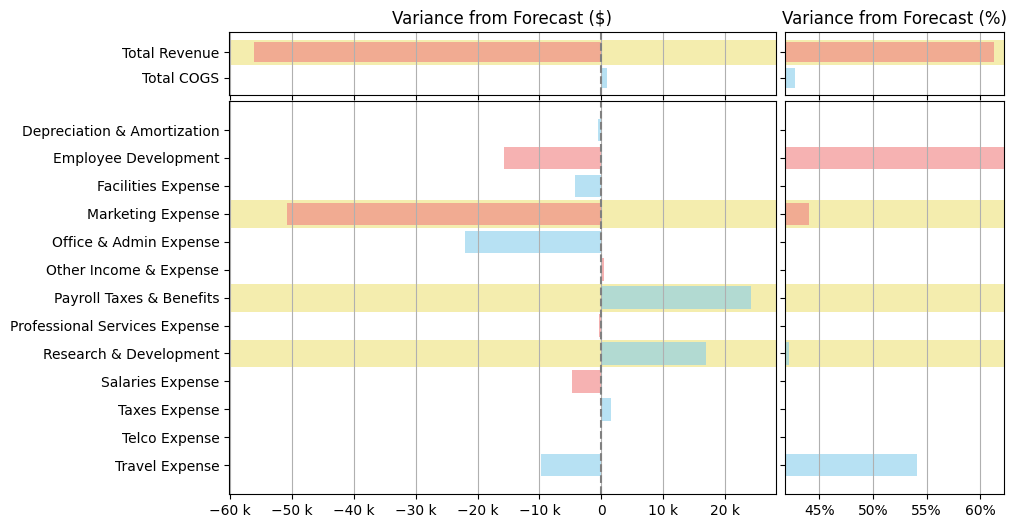

In [13]:
from matplotlib.ticker import EngFormatter
import matplotlib.gridspec as gridspec

min_val_1 = min(rc_diff_sorted.values.min(), exp_diff_sorted.values.min())
max_val_1 = max(rc_diff_sorted.values.max(), exp_diff_sorted.values.max())

min_val_2 = min(rc_diff_pct_sorted.values.min(), exp_diff_pct_sorted.values.min())
max_val_2 = max(rc_diff_pct_sorted.values.max(), exp_diff_pct_sorted.values.max())

fig = plt.figure(figsize=(10,6))
gs = gridspec.GridSpec(2, 2, width_ratios=[2.5,1], height_ratios=[0.16,1])

ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])
ax4 = plt.subplot(gs[3])

ax1.set_title('Variance from Forecast ($)')
ax2.set_title('Variance from Forecast (%)')

ax1.axhspan(bar_pos_0-0.5, bar_pos_0+0.5, facecolor='khaki', alpha=0.7)

ax1.barh(rc_labels.loc[0], rc_diff_sorted.values, color=colors, alpha=0.6)
#ax1.xaxis.set_major_formatter(EngFormatter())
ax1.grid(axis='x')
ax1.axvline(0, color='grey', linestyle='--')  # Add a vertical line at x=0

# Increase the range of the y-axis by 10% on both sides - to improve bar<>boundary spacing
ymin, ymax = ax1.get_ylim()
ax1.set_ylim(ymin - 0.1*(ymax-ymin), ymax + 0.1*(ymax-ymin))

ax2.axhspan(bar_pos_0-0.5, bar_pos_0+0.5, facecolor='khaki', alpha=0.7)
ax2.barh(rc_pct_labels.loc[0], rc_diff_pct_sorted.values, color=colors, alpha=0.6)

#formatter = FuncFormatter(lambda x, pos: "{:.0%}".format(x))
#ax2.xaxis.set_major_formatter(formatter)

ax2.yaxis.set_ticklabels([])
ax2.grid(axis='x')
ax2.axvline(0, color='grey', linestyle='--')  # Add a vertical line at x=0

# Increase the range of the y-axis by 10% on both sides - to improve bar<>boundary spacing
ymin, ymax = ax2.get_ylim()
ax2.set_ylim(ymin - 0.1*(ymax-ymin), ymax + 0.1*(ymax-ymin))

# set xlim of ax1, ax2 to encompass all data with a 5% padding
ax1.set_xlim(min_val_1 - 0.05*(max_val_1-min_val_1), max_val_1 + 0.05*(max_val_1-min_val_1))
ax2.set_xlim(min_val_2 - 0.05*(max_val_2-min_val_2), max_val_2 + 0.05*(max_val_2-min_val_2))


ax1.set_xticklabels([])
ax2.set_xticklabels([])

ax3.axhspan(bar_pos_1-0.5, bar_pos_1+0.5, facecolor='khaki', alpha=0.7)
ax3.axhspan(bar_pos_2-0.5, bar_pos_2+0.5, facecolor='khaki', alpha=0.7)
ax3.axhspan(bar_pos_3-0.5, bar_pos_3+0.5, facecolor='khaki', alpha=0.7)


ax3.barh(exp_labels.loc[0], exp_diff_sorted.values, color=colors, alpha=0.6)
ax3.xaxis.set_major_formatter(EngFormatter())

ax3.grid(axis='x')
ax3.axvline(0, color='grey', linestyle='--')  # Add a vertical line at x=0


pct_colors = ['skyblue' if value >= 0 else 'lightcoral' for value in exp_diff_pct_sorted.values]

from matplotlib.ticker import FuncFormatter

ax4.axhspan(bar_pos_1-0.5, bar_pos_1+0.5, facecolor='khaki', alpha=0.7)
ax4.axhspan(bar_pos_2-0.5, bar_pos_2+0.5, facecolor='khaki', alpha=0.7)
ax4.axhspan(bar_pos_3-0.5, bar_pos_3+0.5, facecolor='khaki', alpha=0.7)

ax4.barh(exp_pct_labels.loc[0], exp_diff_pct_sorted.values, color=colors, alpha=0.6)

formatter = FuncFormatter(lambda x, pos: "{:.0%}".format(x))
ax4.xaxis.set_major_formatter(formatter)

ax4.yaxis.set_ticklabels([])
ax4.grid(axis='x')

ax4.axvline(0, color='grey', linestyle='--')  # Add a vertical line at x=0



ax3.set_xlim(ax1.get_xlim())
ax4.set_xlim(ax2.get_xlim())

fig.subplots_adjust(wspace=0.025, hspace=0.025)  # Decrease this value to move subplots closer together.

plt.savefig('ni_var.png')
plt.show()


In [15]:
cf_diff = diff[diff.index.str.startswith('cf_')]
cf_diff_sorted = cf_diff #.sort_index(ascending=False)
bc_diff = diff[['net_chg_cash','cash']]
bc_diff_sorted = bc_diff.sort_index(ascending=False)

cf_diff_pct = diff_pct[diff_pct.index.str.startswith('cf_')]
cf_diff_pct_sorted = cf_diff_pct #.sort_index(ascending=False)
bc_diff_pct = diff_pct[['net_chg_cash','cash']]
bc_diff_pct_sorted = bc_diff_pct.sort_index(ascending=False)

bc_diff_sorted = bc_diff_sorted.replace([np.inf, -np.inf], 0).fillna(0)
bc_diff_pct_sorted = bc_diff_pct_sorted.replace([np.inf, -np.inf], 0).fillna(0)
cf_diff_sorted = cf_diff_sorted.replace([np.inf, -np.inf], 0).fillna(0)
cf_diff_pct_sorted = cf_diff_pct_sorted.replace([np.inf, -np.inf], 0).fillna(0)

In [16]:
cf_labels = fm_data_for_labels[cf_diff_sorted.index][:1]
cf_pct_labels = fm_data_for_labels[cf_diff_pct_sorted.index][:1]
bc_labels = fm_data_for_labels[bc_diff_sorted.index][:1]
bc_pct_labels = fm_data_for_labels[bc_diff_pct_sorted.index][:1]

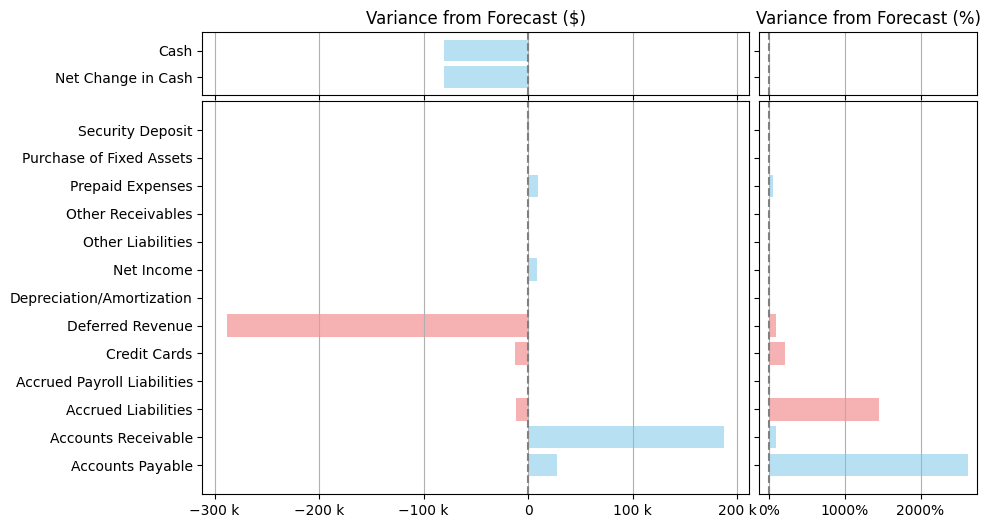

In [17]:
min_val_1 = min(bc_diff_sorted.values.min(), cf_diff_sorted.values.min())
max_val_1 = max(bc_diff_sorted.values.max(), cf_diff_sorted.values.max())

min_val_2 = min(bc_diff_pct_sorted.values.min(), cf_diff_pct_sorted.values.min())
max_val_2 = max(bc_diff_pct_sorted.values.max(), cf_diff_pct_sorted.values.max())

fig = plt.figure(figsize=(10,6))
gs = gridspec.GridSpec(2, 2, width_ratios=[2.5,1], height_ratios=[0.16,1])

ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])
ax4 = plt.subplot(gs[3])

colors = ['skyblue' if value >= 0 else 'lightcoral' for value in cf_diff_sorted.values]
pct_colors = ['skyblue' if value >= 0 else 'lightcoral' for value in cf_diff_pct_sorted.values]

ax1.set_title('Variance from Forecast ($)')
ax2.set_title('Variance from Forecast (%)')

ax1.barh(bc_labels.loc[0], bc_diff_sorted.values, color=colors, alpha=0.6)
#ax1.xaxis.set_major_formatter(EngFormatter())
ax1.grid(axis='x')
ax1.axvline(0, color='grey', linestyle='--')  # Add a vertical line at x=0

# Increase the range of the y-axis by 10% on both sides - to improve bar<>boundary spacing
ymin, ymax = ax1.get_ylim()
ax1.set_ylim(ymin - 0.1*(ymax-ymin), ymax + 0.1*(ymax-ymin))

ax2.barh(bc_pct_labels.loc[0], bc_diff_pct_sorted.values, color=colors, alpha=0.6)

#formatter = FuncFormatter(lambda x, pos: "{:.0%}".format(x))
#ax2.xaxis.set_major_formatter(formatter)

ax2.yaxis.set_ticklabels([])
ax2.grid(axis='x')
ax2.axvline(0, color='grey', linestyle='--')  # Add a vertical line at x=0

# Increase the range of the y-axis by 10% on both sides - to improve bar<>boundary spacing
ymin, ymax = ax2.get_ylim()
ax2.set_ylim(ymin - 0.1*(ymax-ymin), ymax + 0.1*(ymax-ymin))

# set xlim of ax1, ax2 to encompass all data with a 5% padding
ax1.set_xlim(min_val_1 - 0.05*(max_val_1-min_val_1), max_val_1 + 0.05*(max_val_1-min_val_1))
ax2.set_xlim(min_val_2 - 0.05*(max_val_2-min_val_2), max_val_2 + 0.05*(max_val_2-min_val_2))

ax1.set_xticklabels([])
ax2.set_xticklabels([])

ax3.barh(cf_labels.loc[0], cf_diff_sorted.values, color=colors, alpha=0.6)
ax3.xaxis.set_major_formatter(EngFormatter())

ax3.grid(axis='x')
ax3.axvline(0, color='grey', linestyle='--')  # Add a vertical line at x=0

ax4.barh(cf_pct_labels.loc[0], cf_diff_pct_sorted.values, color=colors, alpha=0.6)

formatter = FuncFormatter(lambda x, pos: "{:.0%}".format(x))
ax4.xaxis.set_major_formatter(formatter)

ax4.yaxis.set_ticklabels([])
ax4.grid(axis='x')

ax4.axvline(0, color='grey', linestyle='--')  # Add a vertical line at x=0

ax3.set_xlim(ax1.get_xlim())
ax4.set_xlim(ax2.get_xlim())

fig.subplots_adjust(wspace=0.025, hspace=0.025)  # Decrease this value to move subplots closer together.

plt.savefig('bs_var.png')
plt.show()


In [502]:
bc_diff_pct_sorted

net_chg_cash    0.079041
cash            0.073384
dtype: float64

In [443]:
cf_diff_sorted

cf_secdeposit              -1250.000000
cf_purchasefa                  0.000000
cf_prepaidexp               9285.020170
cf_otherrec                    0.000000
cf_otherliabs                  0.000000
cf_netincome                8722.192000
cf_depamort                 -547.002501
cf_deferredrev           -287834.952820
cf_creditcards            -12351.497600
cf_accruedpayrollliabs      -343.750000
cf_accruedliabs           -11147.173202
cf_accountsreceivable     187836.833370
cf_accountspayable         27530.195967
dtype: float64

In [404]:
cf_diff_largest = cf_diff[cf_diff.abs().nlargest(5).index]
other = cf_diff.drop(cf_diff_largest.index).sum()
cf_diff_largest = pd.concat([cf_diff_largest, pd.Series({'cf_other': other})])
cf_diff_largest_sorted = cf_diff_largest.sort_index(ascending=False)

In [435]:
min_val_2 = min(bc_diff_pct_sorted.values.min(), cf_diff_pct_sorted.values.min())

In [436]:
min_val_2

0.0012613359094606192

In [425]:
bc_diff_pct_sorted.values.min()

0.0012613359094606192

In [426]:
bc_diff_pct_sorted

net_chg_cash    0.079041
cash            0.001261
dtype: float64

In [428]:
cf_diff_pct_sorted.values.min()

nan

In [532]:
diff

4010                      -56167.047140
6010                       13967.789900
6020                           0.000000
6030                      -18750.000000
6040                           0.000000
cf_accountspayable         27530.195967
cf_accountsreceivable     187836.833370
cf_accruedliabs           -11147.173202
cf_accruedpayrollliabs      -343.750000
cf_creditcards            -12351.497600
cf_deferredrev           -287834.952820
cf_depamort                 -547.002501
cf_netincome                8722.192000
cf_otherliabs                  0.000000
cf_otherrec                    0.000000
cf_prepaidexp               9285.020170
cf_purchasefa                  0.000000
cf_secdeposit              -1250.000000
exp_depamort                -547.002501
exp_empdev                -15706.330000
exp_facilities             -4191.165000
exp_marketing             -50873.300000
exp_officeadmin           -22090.482000
exp_otherincexp              372.600000
exp_payrolltb              24217.669990


In [445]:
diff_pct

4010                      -0.612899
6010                       0.018944
6020                            NaN
6030                      -1.000000
6040                            NaN
arr                        0.124538
cac                       -0.225912
cash                       0.001261
cf_accountspayable       -26.192893
cf_accountsreceivable     -0.912554
cf_accruedliabs          -14.580747
cf_accruedpayrollliabs         -inf
cf_creditcards            -2.097724
cf_deferredrev            -0.961506
cf_depamort               -0.086395
cf_netincome              -0.007905
cf_otherliabs                   NaN
cf_otherrec                     NaN
cf_prepaidexp             -0.583316
cf_purchasefa                   NaN
cf_secdeposit                  -inf
exp_depamort              -0.086395
exp_empdev                -0.923902
exp_facilities            -0.130435
exp_marketing             -0.440461
exp_officeadmin           -0.247092
exp_otherincexp            0.030101
exp_payrolltb              0

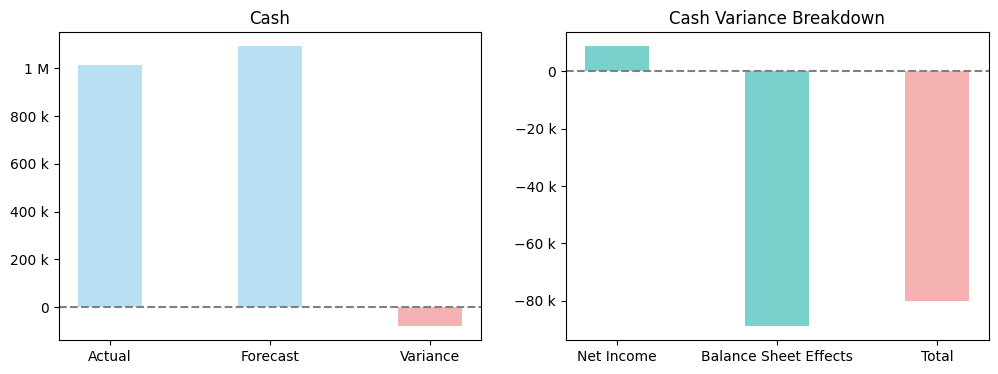

In [18]:

fig, axes = plt.subplots(1, 2, figsize=(12,4))

# Bar colors
bar_colors1 = ['skyblue', 'skyblue', 'lightcoral']  # Customize these as needed
bar_colors2 = ['lightseagreen', 'lightseagreen', 'lightcoral']  # Customize these as needed

cash_act = fm_data_new.loc[variance_months, 'cash'].iloc[-1]
cash_fcast = fm_data_old.loc[variance_months, 'cash'].iloc[-1]
cash_var = cash_act - cash_fcast
cash_df = pd.DataFrame({'Cash': ['Actual', 'Forecast', 'Variance'], 'Value': [cash_act, cash_fcast, cash_var]})
axes[0].bar(cash_df['Cash'], cash_df['Value'], color=bar_colors1, alpha=0.6, width=0.4)
axes[0].axhline(0, color='grey', linestyle='--')  # Add grey line
axes[0].yaxis.set_major_formatter(EngFormatter())  # Apply engineering notation
axes[0].set_title(cash_df.columns[0])  # Set title as index name

var_ni = sum_diff['net_income']
var_bs = cash_var - var_ni
var_df = pd.DataFrame({'Cash Variance Breakdown': ['Net Income', 'Balance Sheet Effects', 'Total'], 'Value': [var_ni, var_bs, cash_var]})
axes[1].bar(var_df['Cash Variance Breakdown'], var_df['Value'], color=bar_colors2, alpha=0.6, width=0.4)
axes[1].axhline(0, color='grey', linestyle='--')  # Add grey line
axes[1].yaxis.set_major_formatter(EngFormatter())  # Apply engineering notation
axes[1].set_title(var_df.columns[0])  # Set title as index name

plt.savefig('var_breakdown.png')
plt.show()

